In [44]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [45]:
import numpy as np
import pandas as pd

In [46]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [47]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [48]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [49]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [50]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [51]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [52]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [34]:
# Maybe I'm dumb, but it seems like a pain to get just the table names out of SQLite. There's probably an easier way than this
# apart from looking at the csv
cursor = engine.execute('select * from measurement')
# instead of cursor.description:
row = cursor.fetchone()
names = row.keys()
names

['id', 'station', 'date', 'prcp', 'tobs']

# Precipitation Analysis
 Design a query to retrieve the last 12 months of precipitation data.
 
 Select only the date and prcp values.
 
 Load the query results into a Pandas DataFrame and set the index to the date column.
 
 Sort the DataFrame values by date.
 
 Plot the results using the DataFrame plot method.

In [56]:
# Calculate the date 1 year ago from the last data point in the database
engine.execute('SELECT date FROM measurement order by date desc limit 5').fetchall()

# Our final date is 2017-08-23 so the lower limit to our range should be 2016-08-23

[('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-22',)]

In [66]:
# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>='2016-08-23', Measurement.date<='2017-08-23').all()

In [67]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rdf = pd.DataFrame(rain, columns = ('date', 'precipitation'))

In [69]:
rdf.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [73]:
rdf.set_index('date', inplace=True)
rdf.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [ ]:
# Sort the dataframe by date
rdf.sort_values(by=['date'], ascending=True, inplace=True)

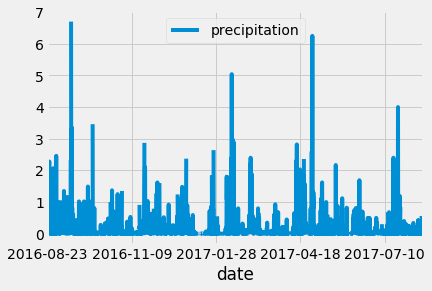

In [78]:
# Use Pandas Plotting with Matplotlib to plot the data
rdf.plot()

In [79]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rdf.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

Design a query to calculate the total number of stations.

Design a query to find the most active stations.


List the stations and observation counts in descending order.
Which station has the highest number of observations?
Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.



Design a query to retrieve the last 12 months of temperature observation data (tobs).


Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [80]:
# Getting the station table column names
cursor = engine.execute('select * from station')
# instead of cursor.description:
row = cursor.fetchone()
names = row.keys()
names

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [85]:
engine.execute('Select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [135]:
# Design a query to show how many stations are available in this dataset?
# I'm much more used to regular SQL queries so I'm getting those working first
# engine.execute('SELECT count(DISTINCT station) FROM station').fetchall()
session.query(func.count(Station.station)).all()

[(9)]

In [132]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# engine.execute('Select station, count(station) from measurement group by station order by count(station) desc').fetchall()
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [138]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

# This is not for our selected time period of one year
# engine.execute("SELECT MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement WHERE station='USC00519281'").fetchall()

# Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [142]:
# Choose the station with the highest number of temperature observations.

# Earlier attempt to use SQL queries, not the dot notation from autobase
# temp_freq = engine.execute("SELECT tobs FROM measurement WHERE station='USC00519281' and date>='2016-08-23'").fetchall()
# temp_df = pd.DataFrame(temp_freq, columns = ['Observed Temperature'])

temp_freq = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281', Measurement.date>='2016-08-23').all()
temp_df = pd.DataFrame(temp_freq, columns = ['Observed Temperature'])

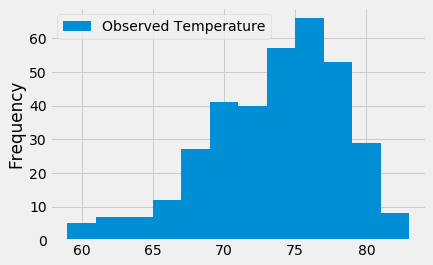

In [143]:
# # temp_df.set_index('Observed Temperature', inplace=True)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Per the instructions, Filter by the station with the highest number of observations. Plot the results as a histogram with bins=12.
temp_df.plot.hist(bins=12)